In [1]:
import torch 
import torchvision 
from torch.utils.data import  DataLoader,datasets,Subset
from torchvision import transforms,datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torchvision.models as models
import torchtext
from torchtext.data import get_tokenizer

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

True

# Functions

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin
        
    def calc_euclidean(self, x1, x2):
        return (x1 - x2).pow(2).sum(1)
    
    def forward(self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor) -> torch.Tensor:
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.margin)

        return losses.mean()
class Network(nn.Module):
    def __init__(self, emb_dim=128):
        super(Network, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 5),
            nn.PReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.3),
            nn.Conv2d(32, 64, 5),
            nn.PReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.3)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(64*4*4, 512),
            nn.PReLU(),
            nn.Linear(512, emb_dim)
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 64*4*4)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x
    

# Hyperperameters

In [4]:
num_epochs = 15
num_classes = 2
learning_rate = 0.001

# Main stuff

In [4]:
test_triplets = pd.read_csv('./task4_be9ai3nsdj/test_triplets.txt',delimiter="\t",header=None)
train_triplets = pd.read_csv('./task4_be9ai3nsdj/train_triplets.txt',delimiter="\t",header=None)

In [5]:
transform = transforms.Compose([transforms.Scale((224,224)),
#                                 transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder('./task4_be9ai3nsdj/food/',transform = transform)

A:\Anaconda\envs\torch\lib\site-packages\torchvision\transforms\transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [24]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=20, shuffle=True)

In [28]:
next(iter(dataloader))

[tensor([[[[-1.1760, -1.3473, -1.1932,  ...,  1.5639,  1.6495,  1.5297],
           [-1.2274, -1.2445, -1.2617,  ...,  1.6495,  1.7009,  1.5468],
           [-1.3302, -1.2103, -1.2959,  ...,  1.5639,  1.6324,  1.6324],
           ...,
           [-1.0048,  0.5536,  0.5536,  ..., -1.4329, -1.4329, -1.2103],
           [-0.9020, -0.6281, -0.5424,  ..., -1.3473, -1.3644, -1.1589],
           [-0.9534, -0.8164, -1.0219,  ..., -1.2788, -1.2274, -1.2445]],
 
          [[-1.0203, -1.2129, -1.0553,  ...,  0.9755,  1.0455,  1.1681],
           [-1.1078, -1.1253, -1.1253,  ...,  1.0630,  1.1331,  1.1506],
           [-1.2479, -1.1253, -1.1779,  ...,  1.0455,  1.1155,  1.1681],
           ...,
           [-0.9153,  0.6604,  0.6078,  ..., -1.2479, -1.2129, -1.1779],
           [-0.8452, -0.5826, -0.5476,  ..., -1.1954, -1.1604, -1.1954],
           [-0.9328, -0.7927, -1.0728,  ..., -1.1429, -1.0553, -1.2829]],
 
          [[-0.8981, -1.0724, -0.9156,  ...,  0.4265,  0.5659,  0.6531],
           [-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


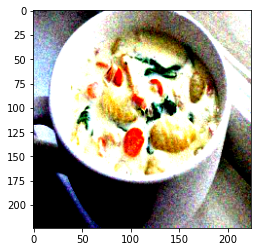

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


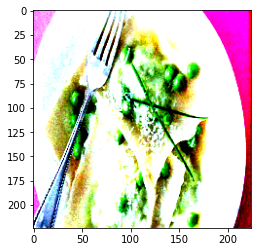

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


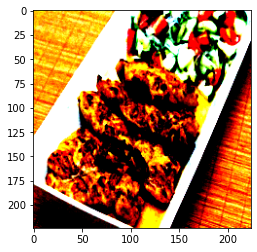

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


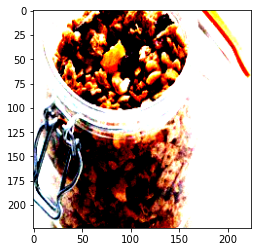

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


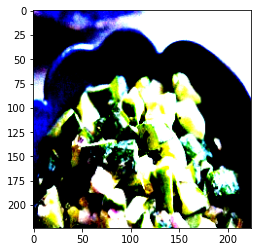

In [29]:
iterables = iter(dataloader)
i = 0
while i < 5:
    
    images, labels = next(iterables)
    plt.figure()
    plt.imshow(images[5].permute(1, 2, 0) )
    plt.show()
    i = i+1
# images.is_cuda

In [9]:
images, labels = next(iter(dataloader))


In [14]:
batch = next(iter(dataloader))

input, target = batch

In [74]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

'02461 03450 02678'

In [85]:
Load_triplet(train_triplets[0][0],dataset)

02461


In [14]:
images[0]

tensor([[[ 0.3138,  0.3309,  0.3823,  ...,  1.0502,  0.7762,  0.8618],
         [ 0.2624,  0.2796,  0.3138,  ...,  0.7419,  0.5707,  0.6221],
         [ 0.1768,  0.2796,  0.3994,  ...,  0.6049,  0.5364,  0.5022],
         ...,
         [ 0.2624,  0.1597,  0.1426,  ...,  0.1254,  0.1254,  0.2453],
         [ 0.6392,  0.6563,  0.5364,  ...,  0.3481,  0.1426, -0.0629],
         [ 0.2796,  0.3823,  0.1939,  ...,  0.5536,  0.2111,  0.2624]],

        [[ 0.1702,  0.2402,  0.3452,  ...,  1.1681,  0.8880,  0.9405],
         [ 0.1001,  0.1527,  0.2577,  ...,  0.8880,  0.6779,  0.6779],
         [-0.0224,  0.1527,  0.3277,  ...,  0.7654,  0.6429,  0.5553],
         ...,
         [ 0.4678,  0.3102,  0.2577,  ..., -0.4776, -0.3901, -0.1450],
         [ 0.8179,  0.8004,  0.6078,  ..., -0.2850, -0.4076, -0.4776],
         [ 0.4853,  0.5903,  0.4153,  ...,  0.0826, -0.2500, -0.1800]],

        [[-0.0441,  0.0256,  0.1302,  ...,  1.1934,  0.8797,  0.9145],
         [-0.1487, -0.0790,  0.0082,  ...,  0

In [110]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

# class resnet18(nn.Module):
#     def __init__(self):
#         super(resnet18,self).__init__()
#         self.features = nn.Sequential(*list(original_model.features.children()[:-3]))
#     def forward(self,x):
#         x=sef.features
model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [114]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')
def get_vector(image_name):
    # 1. Load the image with Pillow library
    
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(image_name.unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding
pic_one_vector = get_vector(images[0])
pic_two_vector = get_vector(images[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


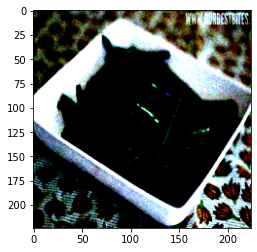

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


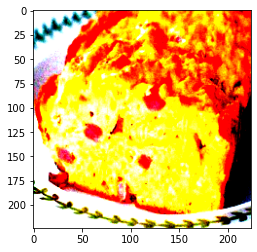


Cosine similarity: tensor([0.9984])



In [115]:
# Using PyTorch Cosine Similarity
plt.imshow(images[0].permute(1, 2, 0) )
plt.show()
plt.imshow(images[1].permute(1, 2, 0) )
plt.show()
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
              pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))

In [129]:
resnet18 = models.resnet18(pretrained=True)
modules=list(resnet152.children())[:-1]
resnet18=nn.Sequential(*modules)
for p in resnet152.parameters():
    p.requires_grad = False

In [130]:
resnet18

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
